# Import Reduired Library , and sklearn model selection , KFLOD

In [1]:
import numpy as np
import pandas as pd 
import cvxpy as cp
from tqdm import tqdm 

import matplotlib.pyplot as plt 
plt.style.use('ggplot')


from sklearn.model_selection import KFold

# Classification model : Logistic Regression 

In [2]:
class Logistic_Regrssion():
    """
    x     --> datatype        , matrix with size (n,m) , n --> sample size ; m --> feature size 
    y     --> traning target  , column vector with size --> (n,1) 
    beta  --> column vector with size -->  (m,1)
    lamda --> regularization pramters  
    """
    def __init__(self,x,y,lambd):

        self.x = x 
        self.y = y 
        self.beta = cp.Variable(x.shape[1])
        self.lambd =lambd 
    
    def loss_function(self,x,y,beta):

        log_likelihood = cp.sum(cp.multiply(y, x @ beta) - cp.logistic(x @ beta) )

        return log_likelihood
    
    def objective_function(self,x,y,beta,lambd):

        obj_fnc = (self.loss_function(x,y,beta) / x.shape[0])  - lambd * self.regulizar(beta)

        return obj_fnc

    def regulizar(self,beta):

        return cp.norm(beta,1)

    def classification_error(self,scores,labels):

        scores[scores > 0  ] = 1
        scores[scores <= 0 ] = 0

        return np.sum(np.abs(scores - labels)) / float(np.size(labels))

    def Make_Prediction(self,beta,x):

        prediction = np.where(np.round(sigmoid(x @ beta),decimals=2 ) > np.round(x @ beta ,decimals=2) , 0,1)

        return prediction
    
    def Optimize(self):

        problem = cp.Problem( cp.Maximize(self.objective_function(x=self.x,y=self.y,beta=self.beta,lambd=self.lambd)) )

        return problem , self.beta


# Generate Dataset

In [3]:
np.random.seed(1)
n = 50
m = 50
def sigmoid(z):
  return 1/(1 + np.exp(-z))

beta_true = np.array([1, 0.5, -0.5] + [0]*(n - 3)) # True Beta 

X      = (np.random.random((m, n)) - 0.5)*10
Y      = np.round(sigmoid(X @ beta_true + np.random.randn(m)*0.5))

X_test = (np.random.random((2*m, n)) - 0.5)*10
Y_test = np.round(sigmoid(X_test @ beta_true + np.random.randn(2*m)*0.5))

print("-"*70)
print("True Beta :",beta_true)
print("-"*70)
print("X sample shape :" , X.shape)
print("Y sample shape :" , Y.shape)

Train_Dataset = pd.DataFrame(X,columns=[ "x" + str(i) for i in range(X.shape[1])])
Train_Dataset['y'] = Y 
Train_Dataset.head()

----------------------------------------------------------------------
True Beta : [ 1.   0.5 -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]
----------------------------------------------------------------------
X sample shape : (50, 50)
Y sample shape : (50,)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.829780,2.203245,-4.998856,-1.976674,-3.532441,-4.076614,-3.137398,-1.544393,-1.032325,0.388167,...,2.481657,-2.195560,2.892793,-3.967740,-0.521065,4.085955,-2.063859,-2.122247,-3.699714,1.0
1,-4.806330,1.788355,-2.883719,-2.344533,-0.084268,-4.466375,0.741176,-3.532714,0.893055,1.997584,...,4.494893,-0.500879,0.783896,-0.918632,-2.629730,4.033795,0.736795,-4.971297,1.171449,0.0
2,-1.733551,0.270581,3.859421,-1.427302,4.085352,1.233601,-4.841788,4.294372,1.908969,4.973229,...,-3.635448,-4.400823,-3.786565,-4.554481,-3.925059,-2.742907,2.129890,0.597170,-4.874440,0.0
3,-4.280257,4.672763,0.681005,-2.967068,-2.476743,2.438259,-3.045705,0.813589,4.700200,3.468288,...,-4.340389,2.350660,2.721780,4.078159,4.319721,-4.860484,-2.656379,1.167784,4.490163,0.0
4,4.501761,0.566532,4.156063,1.415662,-1.099923,-0.140093,1.043105,0.495479,4.261814,4.187334,...,3.928887,0.778572,-3.159898,2.879292,1.120312,-4.460907,-0.798063,1.790688,4.186018,1.0


In [4]:
kf = KFold(n_splits=5, random_state=None, shuffle=False)
print("without shuffle" )

for train_index, test_index in kf.split(X) : 

    print("-"*20)
    print("train_index :" , train_index)
    print("test_index  : ", test_index)


without shuffle
--------------------
train_index : [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
test_index  :  [0 1 2 3 4 5 6 7 8 9]
--------------------
train_index : [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
test_index  :  [10 11 12 13 14 15 16 17 18 19]
--------------------
train_index : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
test_index  :  [20 21 22 23 24 25 26 27 28 29]
--------------------
train_index : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 40 41 42 43 44 45 46 47 48 49]
test_index  :  [30 31 32 33 34 35 36 37 38 39]
--------------------
train_index : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
test_index  :  [

# Finding Lambda with Cross valiadtion - K-fold

In [5]:
train_error = []
test_error  = []
beta_vals   = []

class arguments():
    trials      = 100
    lambda_vals = np.logspace(-2, 0, trials)

arg = arguments()
len(arg.lambda_vals)

100

In [6]:
for train_index, test_index in kf.split(X) : 

    x_train = X[train_index]
    y_train = Y[train_index]

    x_test = X[test_index]
    y_test = Y[test_index]

    subset_train_error = []
    subset_test_error  = []


    for i,v in enumerate(tqdm(arg.lambda_vals)):

        Model = Logistic_Regrssion(x_train,y_train,v)
        prob ,params = Model.Optimize()
        prob.solve()

        subset_train_error.append( Model.classification_error( (x_train @ params).value  , y_train  )  )
        subset_test_error.append( Model.classification_error(  (x_test @ params).value   , y_test   )  )

    
    train_error.append(subset_train_error)
    test_error.append(subset_test_error)


100%|██████████| 100/100 [00:01<00:00, 83.53it/s]


In [7]:
train_errors = np.array(train_error).mean(axis=0)
test_errors  = np.array(test_error).mean(axis=0)

In [8]:
def plot_train_test_errors(train_errors, test_errors, lambd_values):

    fig , ax = plt.subplots(figsize=(12,6))
    ax.set_title("Mean Squared Error (MSE)")
    ax.plot(lambd_values, train_errors, label="Train error")
    ax.plot(lambd_values, test_errors, label="Test error")
    ax.set_xlabel(r"$\lambda$", fontsize=16)
    ax.set_ylabel('Y Values')
    ax.legend(loc="upper left")
    plt.xscale("log")
    plt.show()

def plot_regularization_path(lambd_values, beta_values,feature_name=None):
    
    num_coeffs = len(beta_values[0])

    fig,ax  = plt.subplots(figsize=(12,6))
    ax.set_title("Regularization Path")
    for i in range(num_coeffs):
        ax.plot(lambd_values, [wi[i] for wi in beta_values],label=feature_name)

    ax.set_xlabel(r"$\lambda$", fontsize=16)
    ax.legend(loc="upper right")
    plt.xscale("log")
    plt.show()

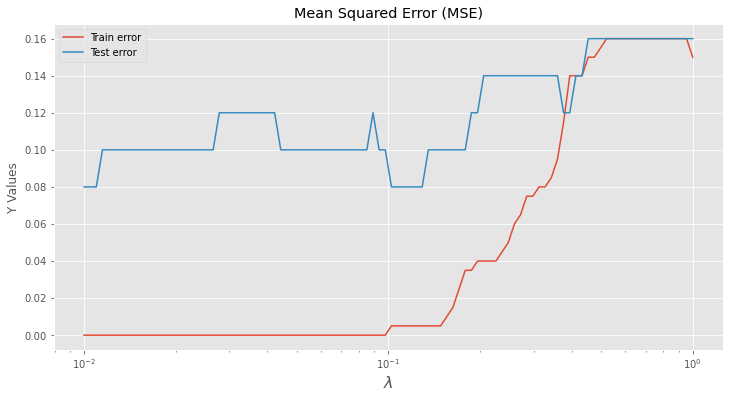

In [9]:
plot_train_test_errors(train_errors, test_errors, arg.lambda_vals)

# Find the CV best Lambda

In [10]:
minimum_test_error_index = list(test_errors).index(np.min(test_errors))
best_lambd               = np.round(list(arg.lambda_vals)[minimum_test_error_index],decimals=2)
best_lambd

0.01

In [11]:
Model = Logistic_Regrssion(X,Y,best_lambd)
prob ,params = Model.Optimize()

print("Maximization Values          : " , prob.solve())
print("Unconstrained Optimal Params : " , np.round(params.value,decimals=2))

Maximization Values          :  -0.06129888977284066
Unconstrained Optimal Params :  [ 1.88  0.85 -0.92 -0.05 -0.   -0.    0.   -0.    0.31  0.   -0.   -0.
 -0.    0.   -0.   -0.    0.    0.    0.   -0.    0.   -0.    0.    0.14
 -0.    0.   -0.21 -0.   -0.21  0.   -0.   -0.   -0.1   0.    0.   -0.
  0.   -0.    0.    0.   -0.   -0.   -0.   -0.   -0.    0.    0.    0.
  0.   -0.13]


In [12]:
from sklearn.metrics import classification_report

# Threashold  = np.round(X_test @ beta.value ,decimals=2)
# Logistic(X) = np.round(sigmoid(X_test @ beta.value ),decimals=2 )

Prediction = Model.Make_Prediction(x=X_test,beta=params.value)
print(classification_report(Prediction,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.96      0.98      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



Compare to Logistic regression with regularization , peforme a little ba better 